# <center>Introduction to Data Science</center> 
### <center>Decision Tree Project 1</center>
### <center>Patient Treatment Classification</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
Based on either the treatment/procedures, lab results or the condition of a patient, medical facility decides whether the patient needs to be assigned either as Inpatient or Outpatient. Inpatient care requires patient to stay at the medical facility for atleast a night while patient receiving outpatient cares needs not to spend a night. 
The dataset contains records of various laboratory test results, age and gender of several patients and determines if the patient needs to be admitted to the medical facility or not. 

#### Objective
**With the help of this dataset we would like to predict whether the patient requires a Inpatient care or Outpatient care.**

#### About the Dataset
This dataset is being used from the Kaggle website and the URL to the dataset is: [Patient Treatment](https://www.kaggle.com/manishkc06/patient-treatment-classification)

It has 11 fields and the description of each field of the dataset are: 
1. **HAEMATOCRIT** - Laboratory test result of haematocrit (measures the ratio of the volume of red blood cells to the total volume of blood)
2. **HAEMOGLOBINS** - Laboratory test result of haemoglobins (measures the iron-containing protein in blood that is essential for oxygen transport)
3. **ERYTHROCYTE** - Laboratory test result of erythrocyte (measures the degree of inflammation present in the body)
4. **LEUCOCYTE** - Laboratory test result of leucocyte (measures the level of leukocytes, or white blood cells)
5. **THROMBOCYTE** - Laboratory test result of thrombocyte (measures the number of platelets in your blood)
6. **MCH** - Laboratory test result of MCH (measures the average amount in each of the red blood cells of a protein which carries oxygen around your body)
7. **MCHC** - Laboratory test result of MCHC (measures the average amount of hemoglobin in a group of red blood cells)
8. **MCV** - Laboratory test result of MCV (measures the average size of your red blood cells)
9. **AGE** - Age of the patient 
10. **SEX** - Gender of the patient 
11. **SOURCE** - Inpatient care or Outpatient care (1=Inpatient, 0=Outpatient)

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Describing the size, shape and dimension of the dataset.
patient_data = pd.read_csv('patient_treatment.csv') 
print("The total size of the dataset is {} bytes.".format(patient_data.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(patient_data.shape[0], patient_data.shape[1], patient_data.shape))
print("The dataset has a {} dimensional structure.".format(patient_data.ndim))

The total size of the dataset is 36399 bytes.
There are 3309 number of records and 11 number of fields with a (3309, 11) shape.
The dataset has a 2 dimensional structure.


In [3]:
print("The top 5 records of the dataset are: \n{}".format(patient_data.head()))

The top 5 records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0  


In [4]:
#Replacing the values F as 1 and M as 1 in the sex field of the dataset. 
#The conversion is required to be able to scale the data within a given range.

patient_data['SEX'] = patient_data['SEX'].replace(['F', 'M'], [1, 0])
print("The top 5 updated records of the dataset are: \n{}".format(patient_data.head()))

The top 5 updated records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE  SEX  SOURCE  
0  80.9   33    1       1  
1  65.0   36    0       0  
2  93.9   70    1       0  
3  89.7   18    1       0  
4  83.7   36    0       0  


In [5]:
#Printing the data types
print("The datatype of the dataset are: \n{}".format(patient_data.dtypes))

The datatype of the dataset are: 
HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX               int64
SOURCE            int64
dtype: object


In [6]:
#Statistical description of the data
print(patient_data.describe().T)

               count        mean         std    min     25%     50%     75%  \
HAEMATOCRIT   3309.0   38.226111    5.971943  13.70   34.30   38.70   42.50   
HAEMOGLOBINS  3309.0   12.749350    2.084325   3.80   11.40   12.90   14.20   
ERYTHROCYTE   3309.0    4.544802    0.784510   1.48    4.04    4.58    5.06   
LEUCOCYTE     3309.0    8.715533    4.991299   1.10    5.70    7.60   10.30   
THROMBOCYTE   3309.0  258.893019  112.676139  10.00  191.00  257.00  322.00   
MCH           3309.0   28.230039    2.696520  14.90   27.20   28.70   29.80   
MCHC          3309.0   33.336476    1.247055  26.00   32.70   33.40   34.10   
MCV           3309.0   84.611333    6.916079  54.00   81.50   85.30   88.80   
AGE           3309.0   46.644303   21.874106   1.00   29.00   48.00   64.00   
SEX           3309.0    0.473255    0.499360   0.00    0.00    0.00    1.00   
SOURCE        3309.0    0.398005    0.489561   0.00    0.00    0.00    1.00   

                  max  
HAEMATOCRIT     69.00  
HAE

### Statistical Numerical and Graphical Summaries

In [7]:
print("Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. \n")

for data_keys in patient_data.keys():
      skewness = patient_data[data_keys].skew()
      if skewness > 0: 
          print(data_keys, "is Right Skewed")
      elif skewness <0:
          print(data_keys, "is Left Skewed")
      else:
          print(data_keys, "is Normally Distributed")

Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. 

HAEMATOCRIT is Left Skewed
HAEMOGLOBINS is Left Skewed
ERYTHROCYTE is Left Skewed
LEUCOCYTE is Right Skewed
THROMBOCYTE is Right Skewed
MCH is Left Skewed
MCHC is Left Skewed
MCV is Left Skewed
AGE is Left Skewed
SEX is Right Skewed
SOURCE is Right Skewed


We can further modify the graph using the pairplot to determine what data fall under Inpatient or Outpatient


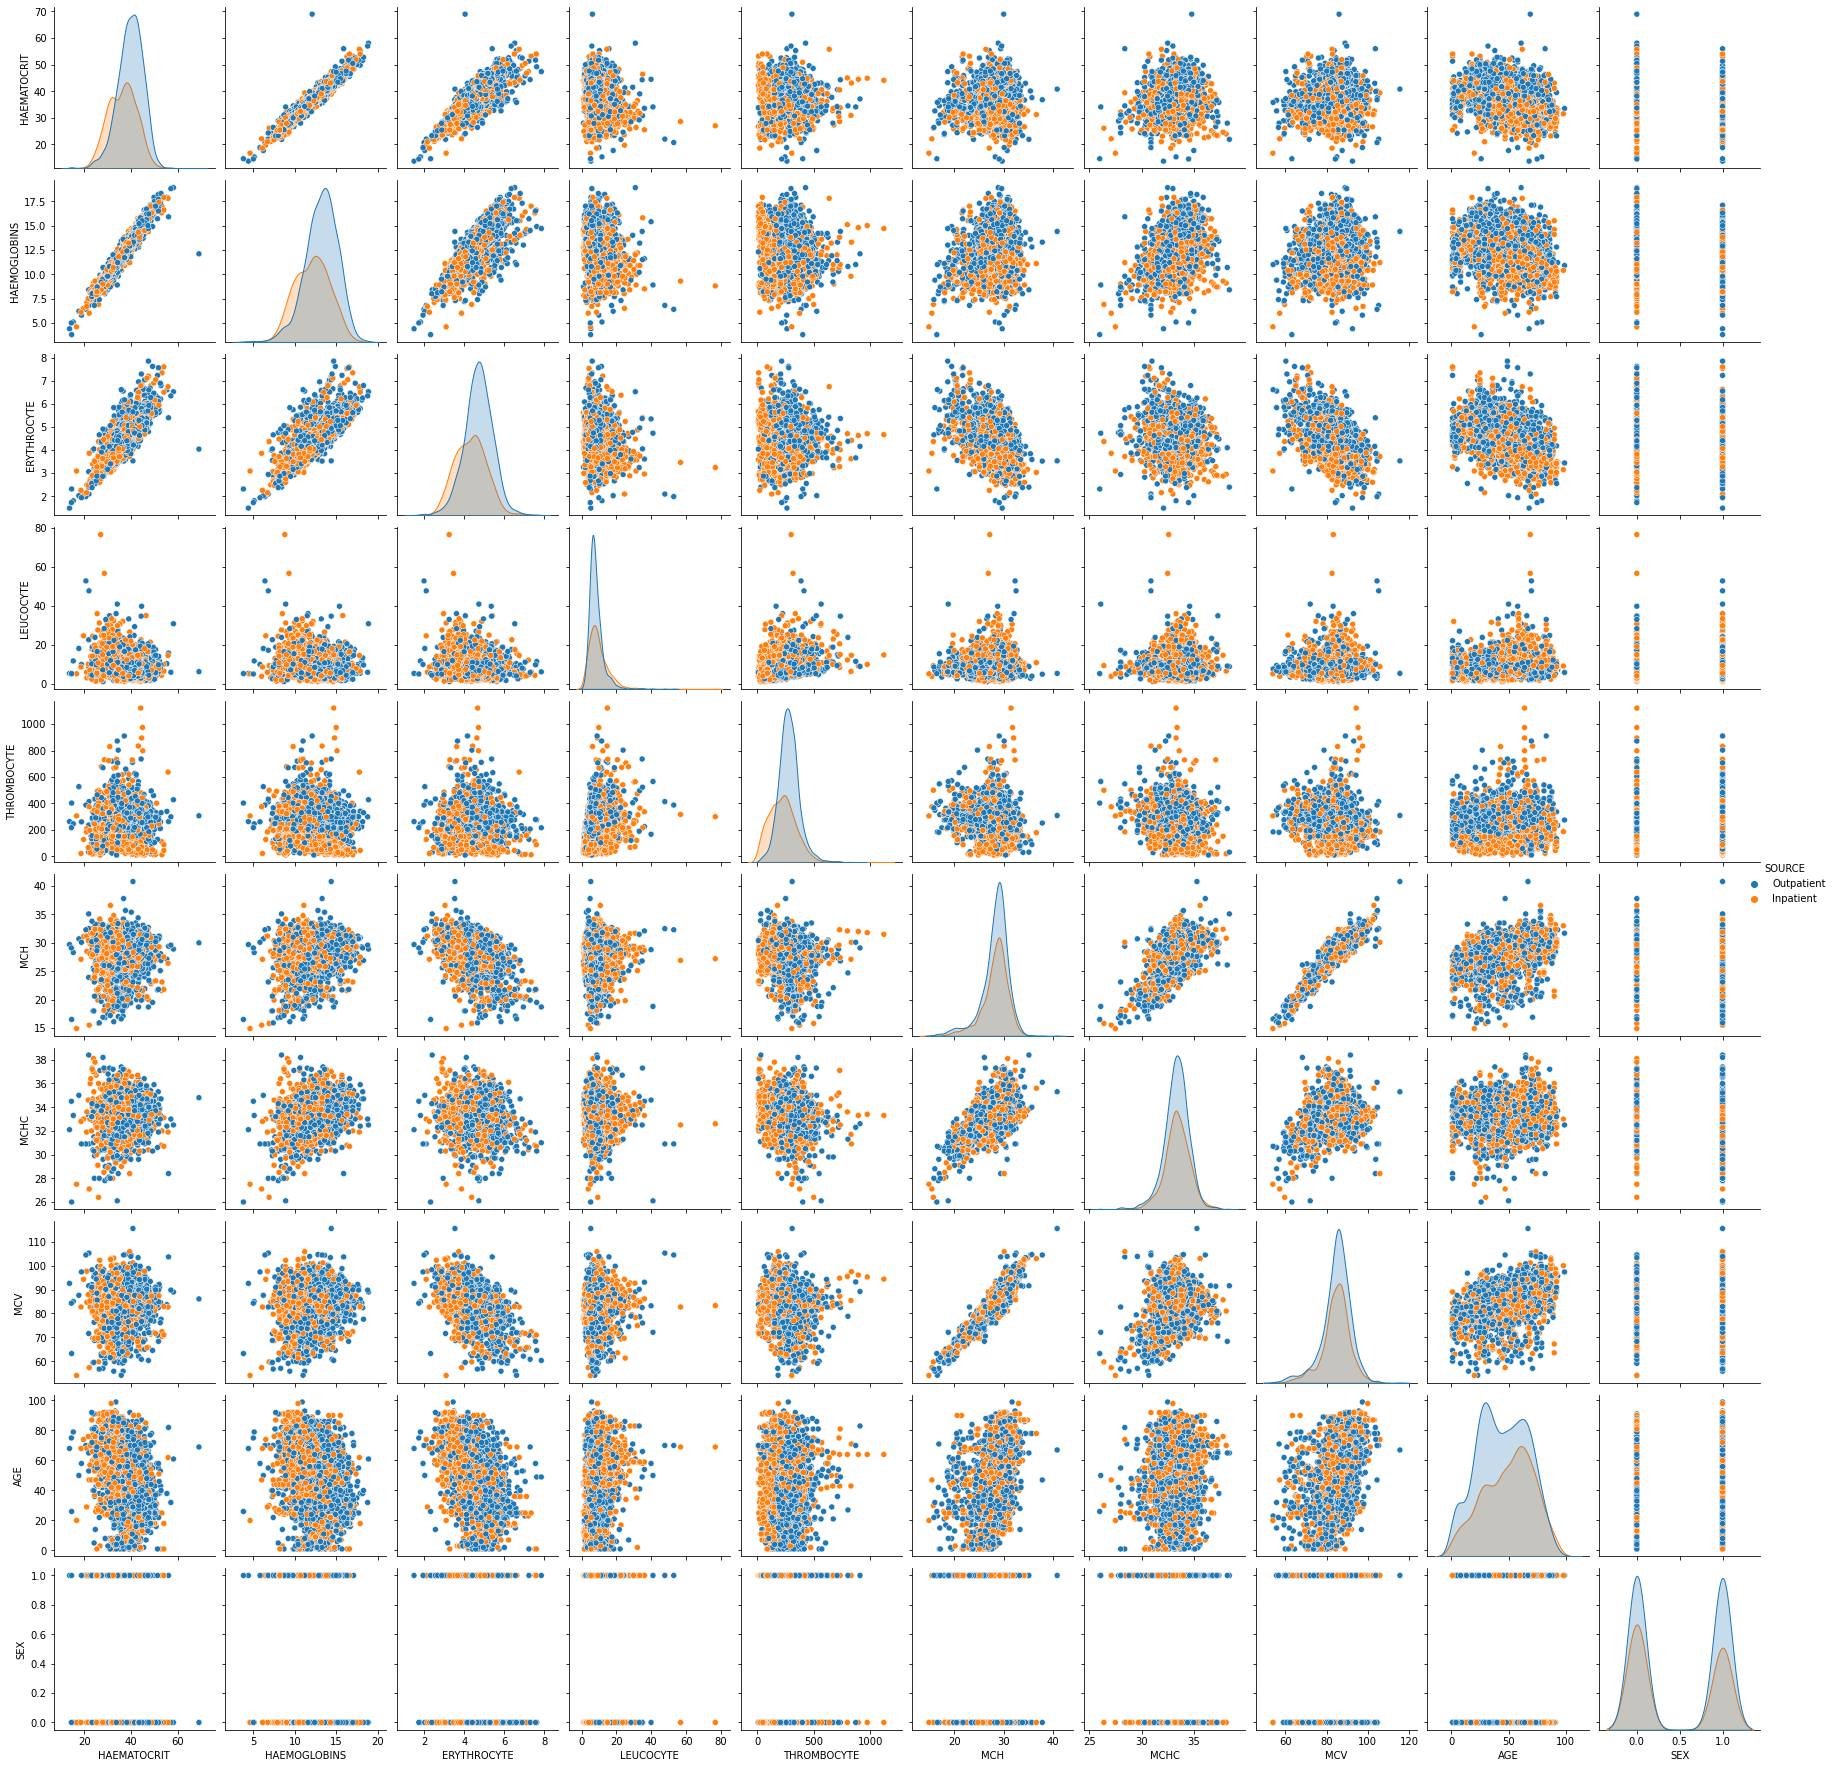

In [8]:
#plotting pairplot to see how the data are scattered based on the target variable
print("We can further modify the graph using the pairplot to determine what data fall under Inpatient or Outpatient")

_sns_pairplot_data = sns.pairplot(patient_data, hue='SOURCE')

#Updating the legend label for ease. 
new_labels = ['Outpatient', 'Inpatient']
for t, l in zip(_sns_pairplot_data._legend.texts, new_labels): 
    t.set_text(l)

In the graph above, the blue dots/area denotes the Outpatient care where as orange represents the Inpatient care. 
We can see there are few outliers in the graph. <br/>
Looking at the graph, on the age and gender column, we can see that the blue and orange dots are dispersed evenly, which might indicate that these fields does not factor in determining the type of care a patient requires. 
However, fields such as Haematocrit, Haemoglobins, Erythrocyte, Leucocyte and Thrombocyte looks to have high impact on determining the type. When the value for these are low, the patient are tend to be admitted to the medical facility.

### Algorithm Implementation and Statistical Tests 

Implementing the Decision Tree algorithm to predict the classification of the Inpatient/Outpatient patient. <br/>

In [9]:
#Selecting all the predictor variables and target variables for the algorithm. 
pred_var = patient_data.iloc[:, 0:10]
targ_var = patient_data['SOURCE']

#Splitting the dataset into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25, random_state=0)

#We know the data for the predictor variables are not under the same ranges, thus scaling/normalization is required.
#Also, we saw that most of the fields are skewed with some outliers. 
#Thus we will be using the Min Max Normalization process to normalize the data across all the fields.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 
#The max_depth of the tree is not defined, thus allowing the tree to be expanded to all the leaf nodes.
tree = DecisionTreeClassifier(criterion="entropy", max_features="sqrt", random_state=1)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

print("\nThe depth of the tree is {}".format(tree.get_depth()))

The accuracy of the training set is 1.0
The accuracy of the testing set is 0.6545893719806763

The depth of the tree is 25


In [10]:
#Creating the classification report for the above prediction. 
predictions = tree.predict(X_test)

print("The classification report is as follows: \n{}".format(classification_report(y_test, predictions)))

The classification report is as follows: 
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       506
           1       0.55      0.60      0.58       322

    accuracy                           0.65       828
   macro avg       0.64      0.65      0.64       828
weighted avg       0.66      0.65      0.66       828



From the classification report we can see that the sensitivity for correctly predicting outpatient is more than the sensitivity of predicting inpatient care. 

Comparing with the result obtained from the K-NN algorithm, the accuracy is prettly low as well as the sensitivity score too. Thus, we can see that the model created here by the decision tree is overfitting and accuracy is lower.

In [11]:
#Plotting the confusion matrix to see how many predictions were predicted correctly.
matrix_data = pd.DataFrame(confusion_matrix(y_test, predictions), index=['F', 'T'], columns=['F', 'T'])

print("The confusion matrix is as follows \n{}\n".format(matrix_data))

The confusion matrix is as follows 
     F    T
F  348  158
T  128  194



The confusion matrix shows us that the false positive and false negative are high as compared to the result from the K-NN algorithm. This justifies the lower accuracy. The prediction are not accurate enough and the data looks to have lots of noise in it. 

In [12]:
#Printing the AUROC curve to see how well the categories are seperated. 
print("The AUROC value is: {}".format(roc_auc_score(y_test, predictions)))

The AUROC value is: 0.6451157538114061


The AUROC value of 0.645 shows that better seperability is not obtained from the classifier with default hyperparameters.

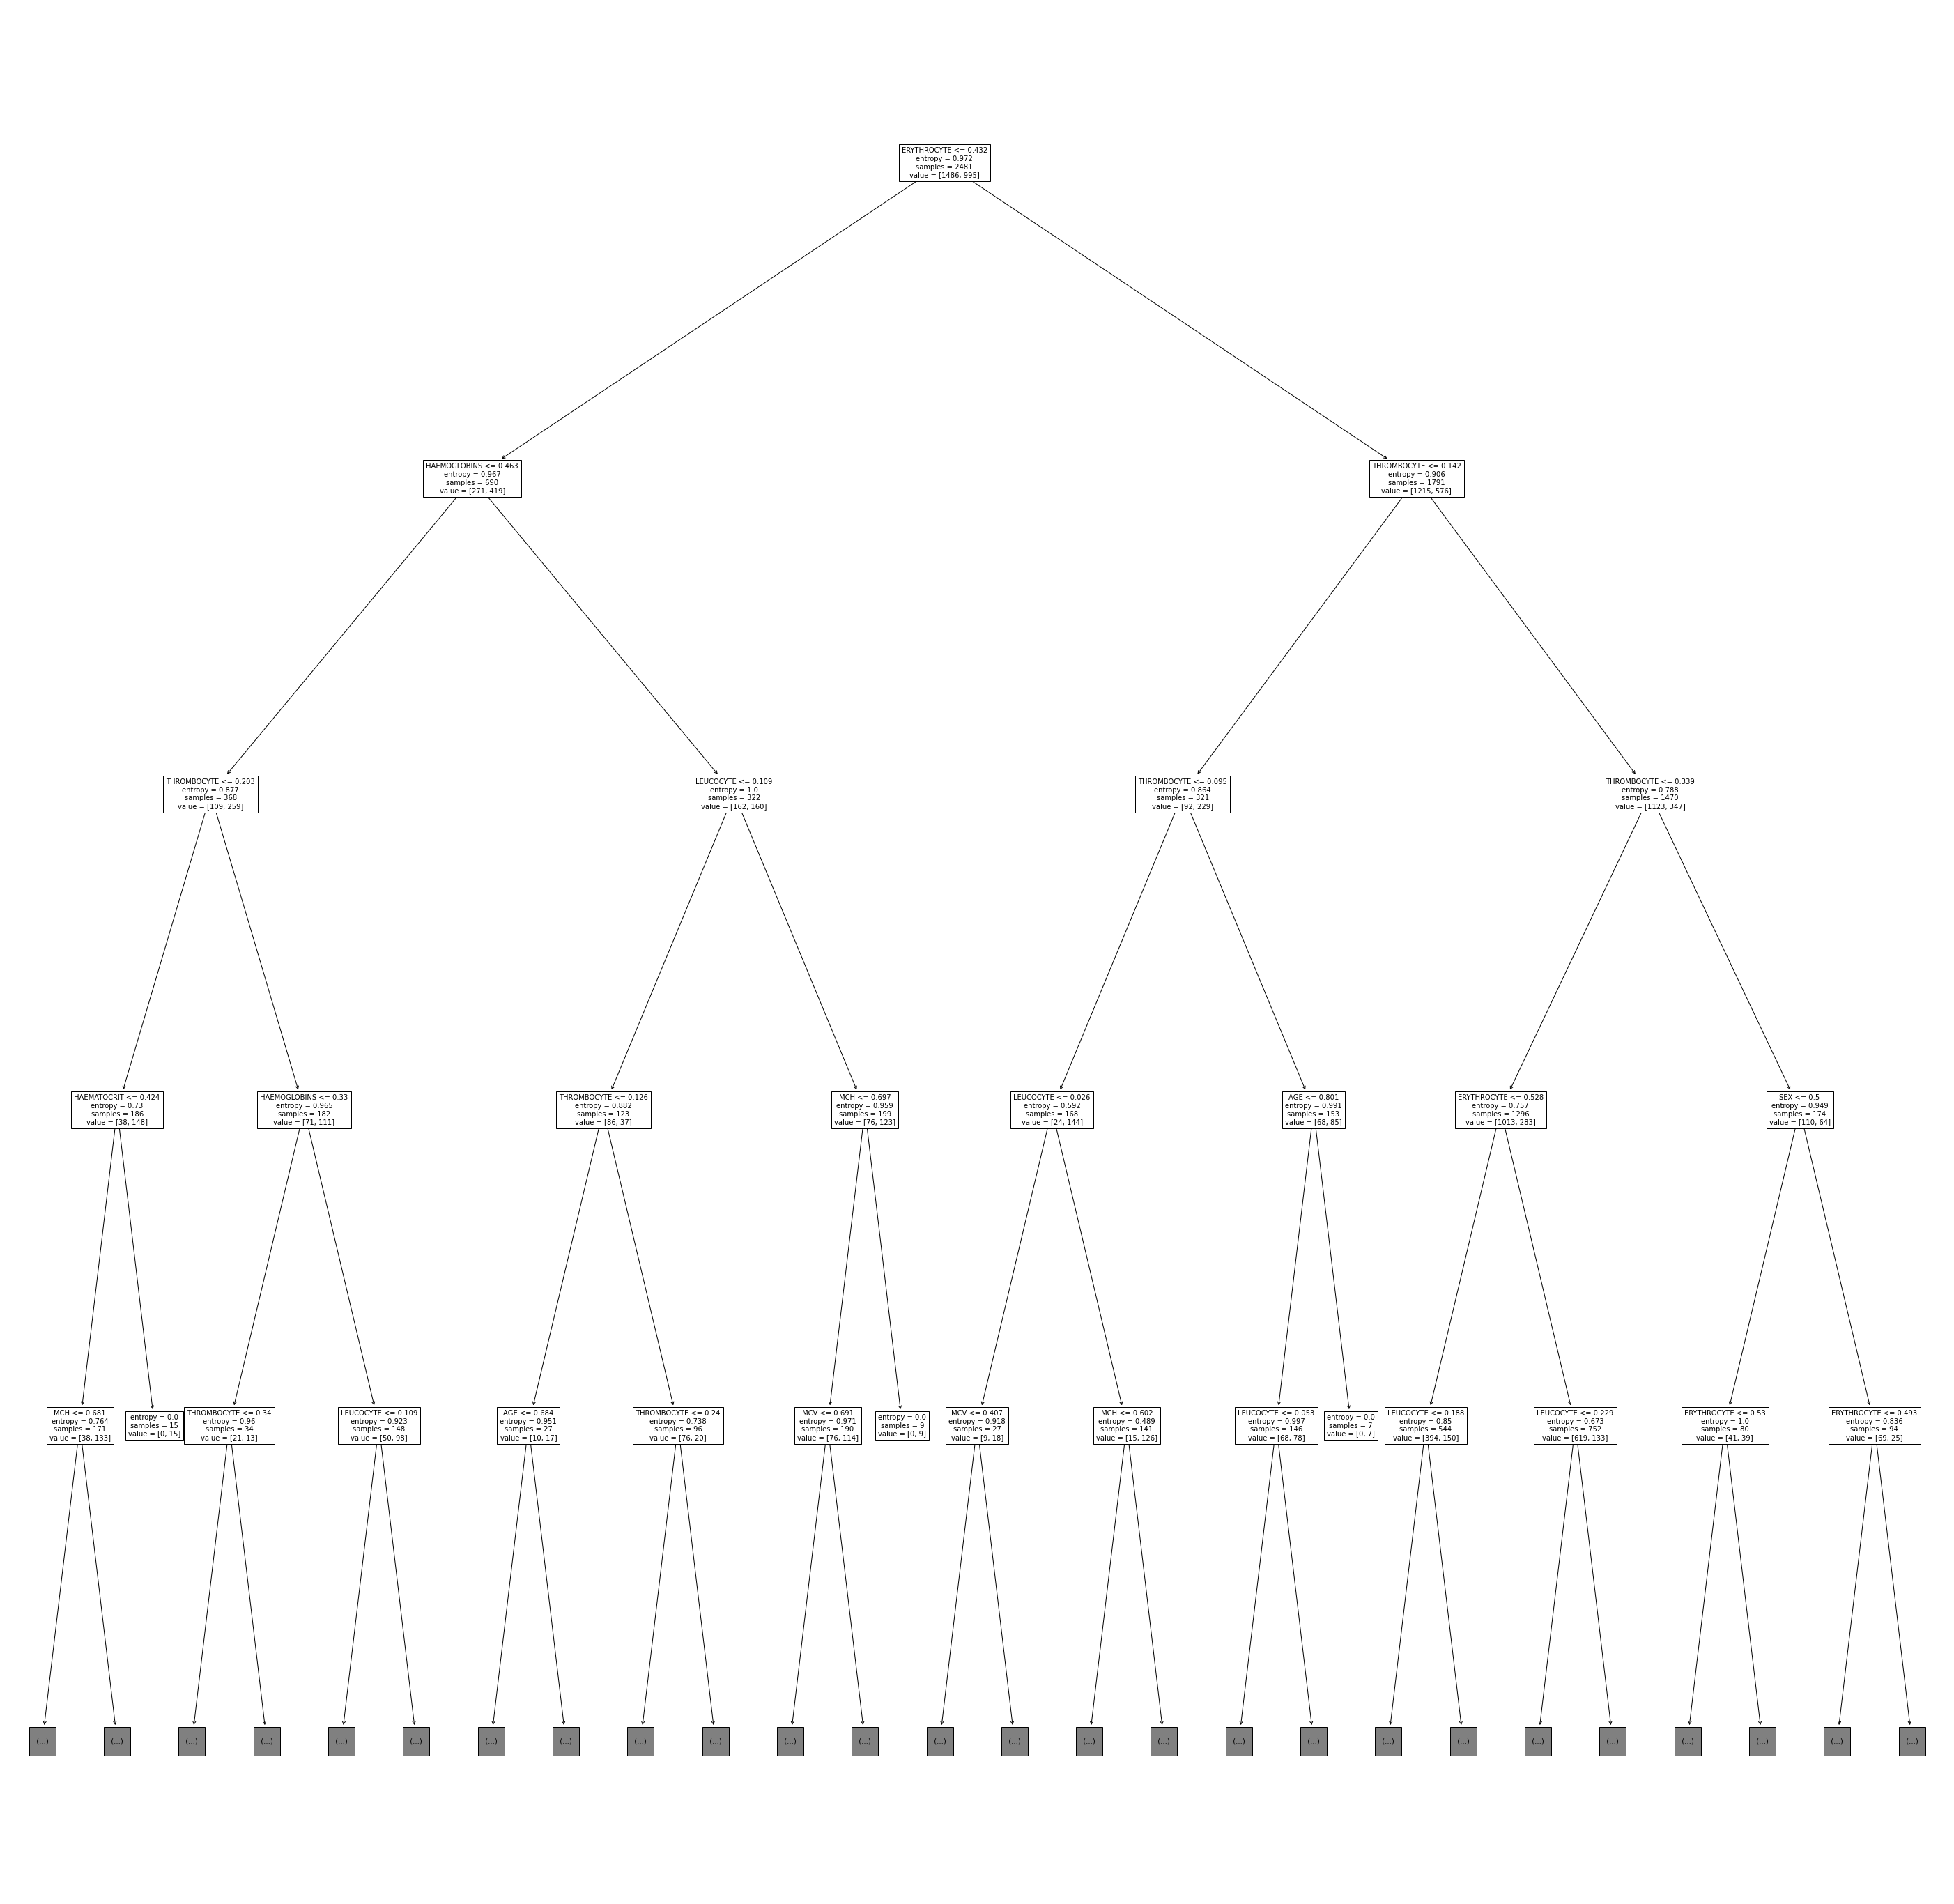

In [13]:
#Displaying the tree for depth as 4
plt.figure(figsize=(50,50))
tree_diagram = plot_tree(tree, max_depth=4, fontsize=10,
                        feature_names=["HAEMATOCRIT", "HAEMOGLOBINS", "ERYTHROCYTE", "LEUCOCYTE", "THROMBOCYTE", "MCH", "MCHC", "MCV", "AGE", "SEX"])
plt.show()

The above tree diagram shows that, most of the nodes have high entropy value which means purity is not obtained from the feature. Along with it, the information gain is not high which describes that the split did not reduce the entropy. 

### Performance Improvement

Max train score 100.0 % with depth of [24]
Max test score 72.70531400966183 % with depth of [3]


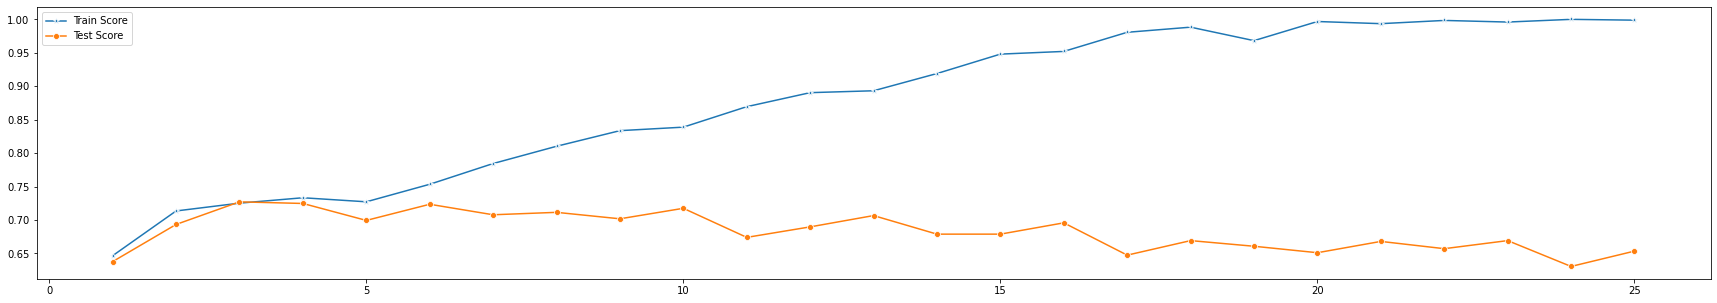

In [14]:
#When we consider to create a tree with the maximum depth, i.e. the depth of the tree is extensive, 
#the data tends to overfit.
#Taking different values for max_depth to see which value for max_depth gives us better performance.

train_accuracy_score=[]
test_accuracy_score=[]

#Taking range from 1,26 as the max depth obtained from the inital run was 25. 
for i in range(1,26): 
    classifier = DecisionTreeClassifier(criterion="entropy", max_features="auto", max_depth=i)
    classifier.fit(X_train, y_train)
    train_accuracy_score.append(classifier.score(X_train, y_train))
    test_accuracy_score.append(classifier.score(X_test, y_test))
    
max_train_score = max(train_accuracy_score)
train_scores_ind = [i for i, v in enumerate(train_accuracy_score) if v == max_train_score]
print('Max train score {} % with depth of {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## Testing Evaluation
max_test_score = max(test_accuracy_score)
test_scores_ind = [i for i, v in enumerate(test_accuracy_score) if v == max_test_score]
print('Max test score {} % with depth of {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

## Train Test Evaluation
plt.figure(figsize=(30,5))
p = sns.lineplot(range(1,26),train_accuracy_score,marker='*',label='Train Score')
p = sns.lineplot(range(1,26),test_accuracy_score,marker='o',label='Test Score')

Here, we can see that the max training score is 100% with depth of 24. This is because the data is overfitting when the decision tree uses the max depth possible. 
However, we can see that with depth of 3, the test score is 73% which is higher than the previous prediction score. Thus, the optimal depth of the tree looks to be 3 with high accuracy. 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

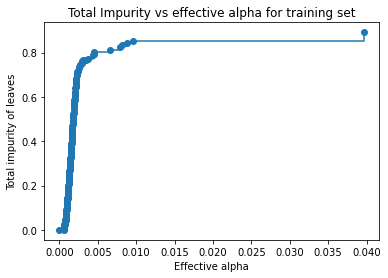

In [29]:
#Another way of optimizing the performance of the algorithm is by pruning.
#Pruning can be done by using the cost_complexity_pruning_path function of the DecisionTreeClassifier.
#Finding the ccp_alpha value to prune the decision tree to obtain optimal value.

classifier = DecisionTreeClassifier(criterion="entropy", max_features="auto", random_state=18)
pruning = classifier.cost_complexity_pruning_path(X_train, y_train)

#The cost_complexity_pruning_path function returns the alphas and the impurities of the subtree level for the 
#corresonding alpha value. 
pruning_alphas, pruning_impurities = pruning.ccp_alphas, pruning.impurities

#Removing the maximum effective alpha as it contains an implementation of one node. 
fig, ax = plt.subplots()
ax.plot(pruning_alphas[:-1], pruning_impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Here, we can see that with the increase in the alpha value, more of the tree is pruned, which increases the impurity of a leaf. Thus, the highest alpha value has only one node in the tree. 

In [30]:
#Obtaining all the decision trees with different alpha values and storing in the trees variable. 
trees = []
for pruning_alpha in pruning_alphas:
    classifier = DecisionTreeClassifier(ccp_alpha=pruning_alpha)
    classifier.fit(X_train, y_train)
    trees.append(classifier)
    
print("Number of nodes in the last tree is {} with pruning alpha {}".format(
      trees[-1].tree_.node_count, pruning_alphas[-1]))

Number of nodes in the last tree is 1 with pruning alpha 0.08093549112491494


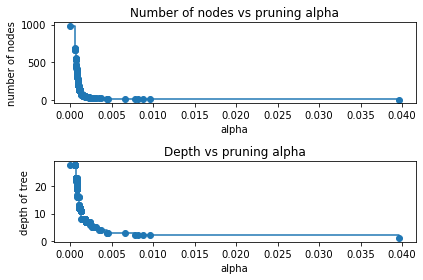

In [31]:
#Removing the last tree as it has only one node. As mentioned above, the tree with highest alpha contains 
#only one node. 
trees = trees[:-1]
pruning_alphas = pruning_alphas[:-1]

#Collecting the number of nodes and depths for each ccp_alpha value.
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]

#Plotting number of nodes vs the pruning alpha value.
fig, ax = plt.subplots(2, 1)
ax[0].plot(pruning_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs pruning alpha")

#Plotting the depth of the tree against the ccp_alpha value. 
ax[1].plot(pruning_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs pruning alpha")
fig.tight_layout()

We can see that the number of nodes decreases with value of alpha increases as mentioned earlier. Similarly, the depth of the tree decreases as lesser the depth of tree, lower the number of nodes are present. 

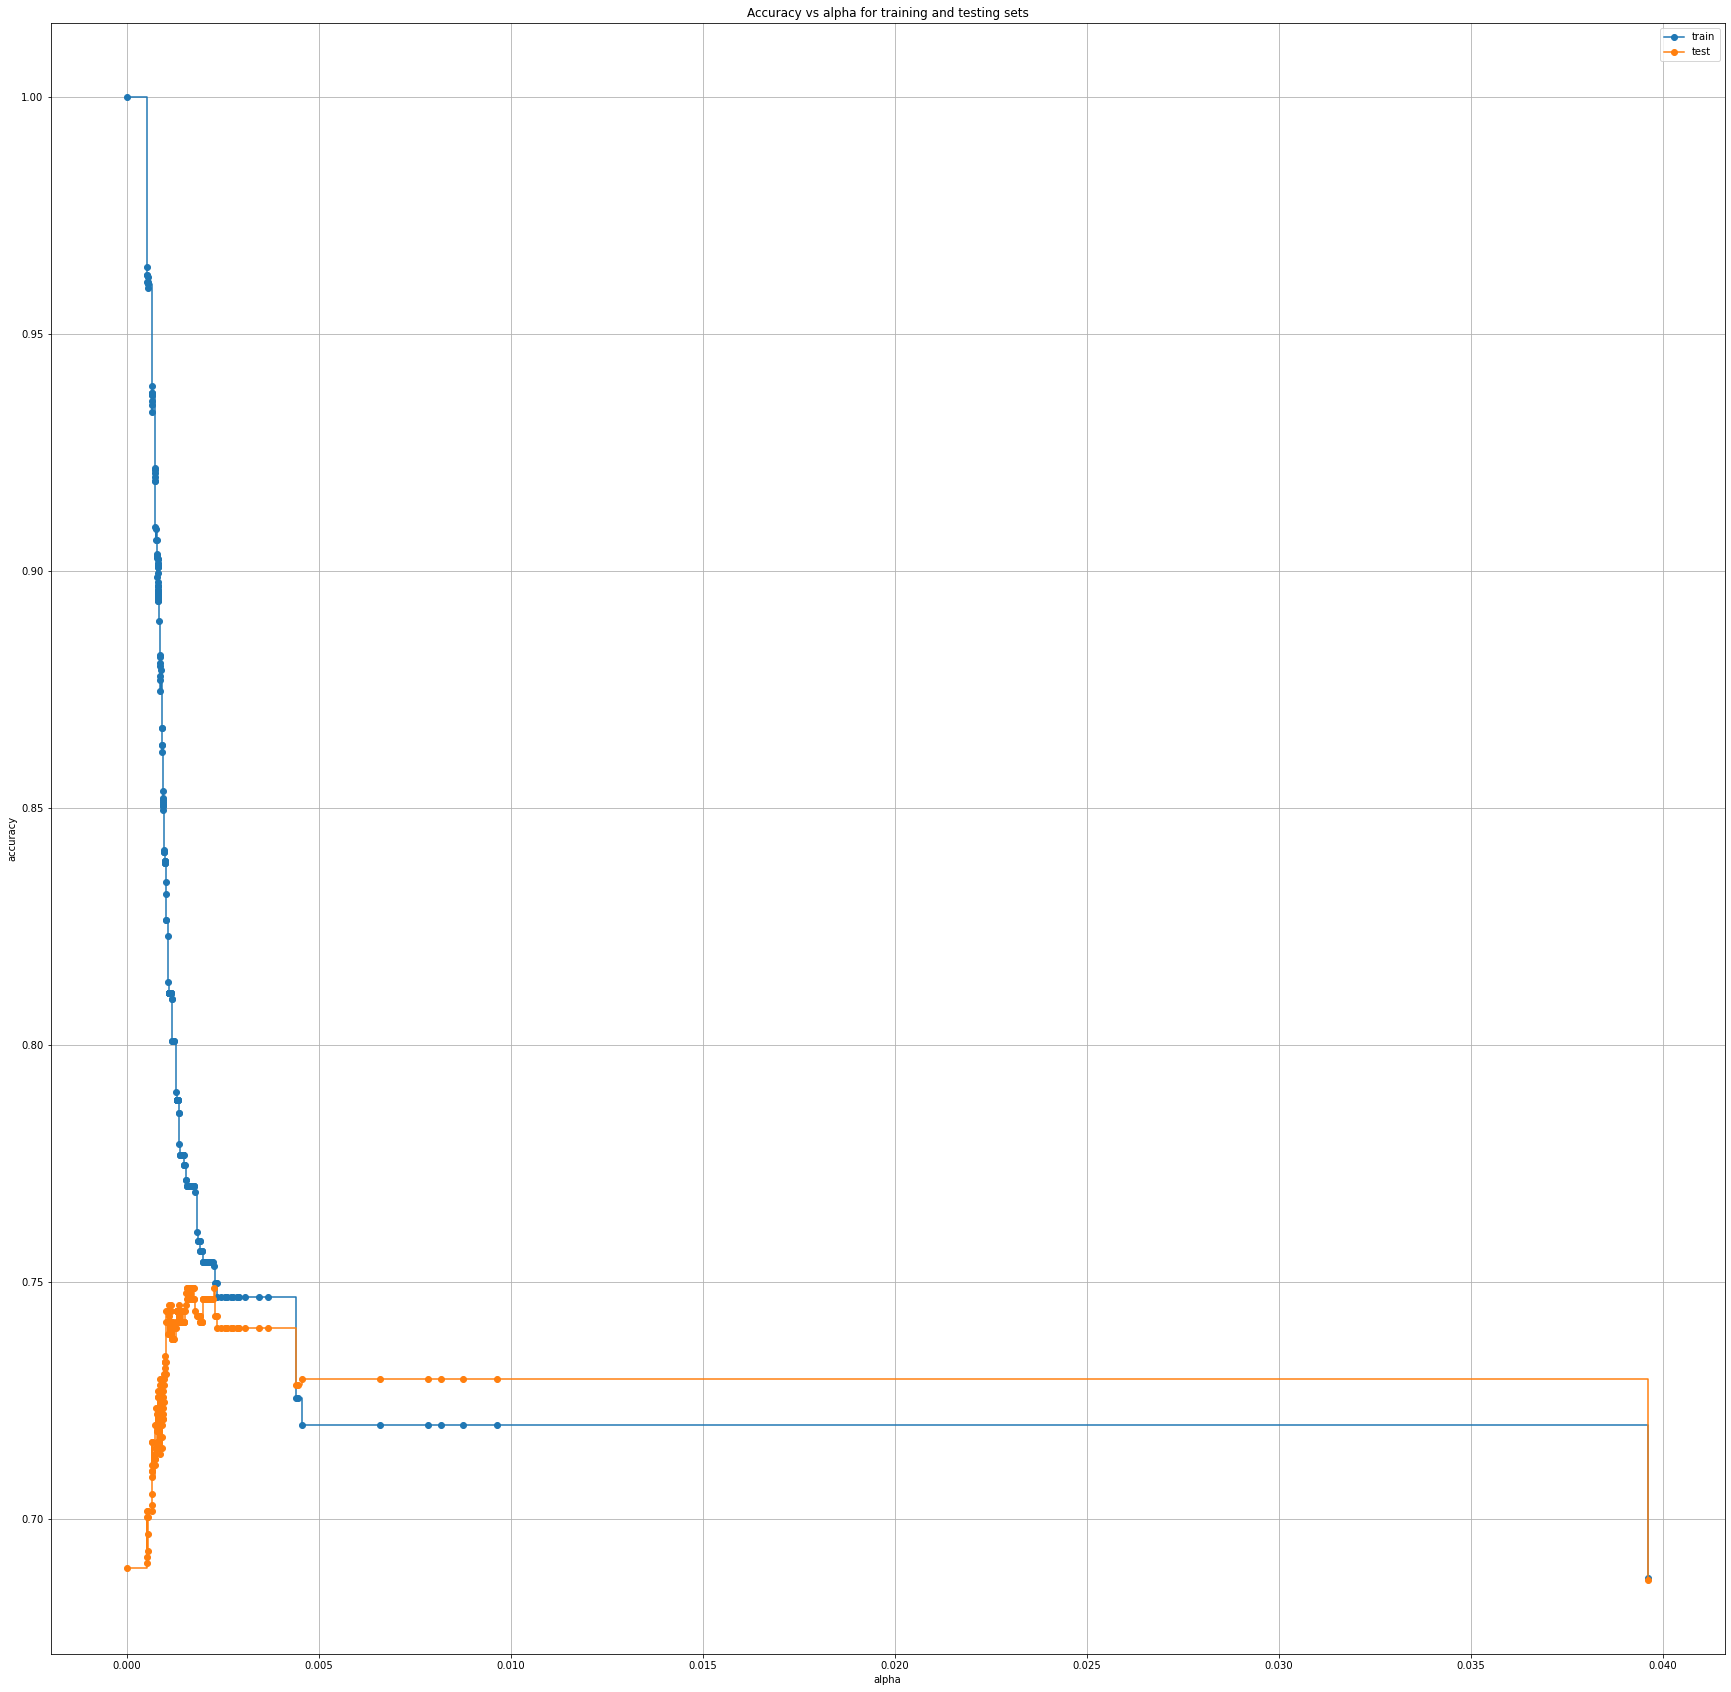

In [32]:
#Now plotting the train-test evaluation to figure out the better ccp_alpha value for the algorithm. 
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

fig, ax = plt.subplots(figsize=(30,30))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(pruning_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(pruning_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

From the above chart we can see that with alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. Here, we can see that with ccp_alpha value somewhere around 0.002 which gives us the better testing score and training score. For, ccp_alpha ~ 0.002 the accuracy on test set is high as well as for the training set. 

In [33]:
#Selecting all the predictor variables and target variables for the algorithm, with CCP_VALUE = 0.002 as 
#obtained above
pred_var = patient_data.iloc[:, 0:10]
targ_var = patient_data['SOURCE']

# #Splitting the dataset into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25, random_state=4)

#We know the data for the predictor variables are not under the same ranges, thus scaling/normalization is required.
#Also, we saw that most of the fields has some outliers and are skewed. 
#Thus we will be using the Min Max Normalization process to normalize the data across all the fields.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 
#The max_depth of the tree is not defined, thus allowing the tree to be expanded to all the leaf nodes.
tree = DecisionTreeClassifier(criterion="entropy", max_features="auto", ccp_alpha=0.002, random_state=5)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

print("\nThe depth of the tree is {}".format(tree.get_depth()))

The accuracy of the training set is 0.8133817009270455
The accuracy of the testing set is 0.6944444444444444

The depth of the tree is 17


In [34]:
#Selecting all the predictor variables and target variables for the algorithm, with max_depth = 3 as obtained above
#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 

tree = DecisionTreeClassifier(criterion="entropy", max_features="auto", max_depth=3, random_state=5)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

The accuracy of the training set is 0.7339782345828295
The accuracy of the testing set is 0.6980676328502415


From the above two implementation we can see that the accuracy for the testing score is at 70%, while the training set accuracy is higher at 73% when max depth of 5 is provided to the classifier.

Taking both the ccp_alpha as 0.002 and max_depth as 3 we get the following results:

In [35]:
#Selecting the predictor variables and target variables for the algorithm, with max_depth = 5 and ccp_alpha = 0.002
#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 
#The max_depth of the tree is not defined, thus allowing the tree to be expanded to all the leaf nodes.
tree = DecisionTreeClassifier(criterion="entropy", max_features="auto", max_depth=5, ccp_alpha=0.002,
                             random_state=11)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

The accuracy of the training set is 0.747279322853688
The accuracy of the testing set is 0.7077294685990339


We can see that the accuracy for the testing set is increased and training set is decreased as compared to the inital implementation with default hyperparameters. The training set is no longer overfitted as before and high accuracy is obtained by using the max depth size of 3 and ccp alpha value as 0.002.

In [36]:
#When using all the features it did not provide us with an efficient accuracy. 
#Thus to try and get better results, we will find the important features that helps in determining 
#the accuracy efficiently. 

#Defining a function to create feature importance based on the model used. 
def find_feature_importance(model):
    feature_scores = pd.Series(model.feature_importances_, index=pred_var.columns).sort_values(ascending=False)

    print("The feature importance scores obtained are: \n{}\n".format(feature_scores))

    f, ax = plt.subplots(figsize=(20, 14))
    ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=pred_var.T)
    ax.set_title("Visualize feature scores of the features")
    ax.set_yticklabels(feature_scores.index)
    ax.set_xlabel("Feature importance score")
    ax.set_ylabel("Features")
    ax.grid()
    plt.show()

The feature importance scores obtained are: 
THROMBOCYTE     0.481528
HAEMATOCRIT     0.330319
LEUCOCYTE       0.065862
ERYTHROCYTE     0.031430
MCH             0.029463
SEX             0.024545
MCHC            0.023319
AGE             0.013533
HAEMOGLOBINS    0.000000
MCV             0.000000
dtype: float64



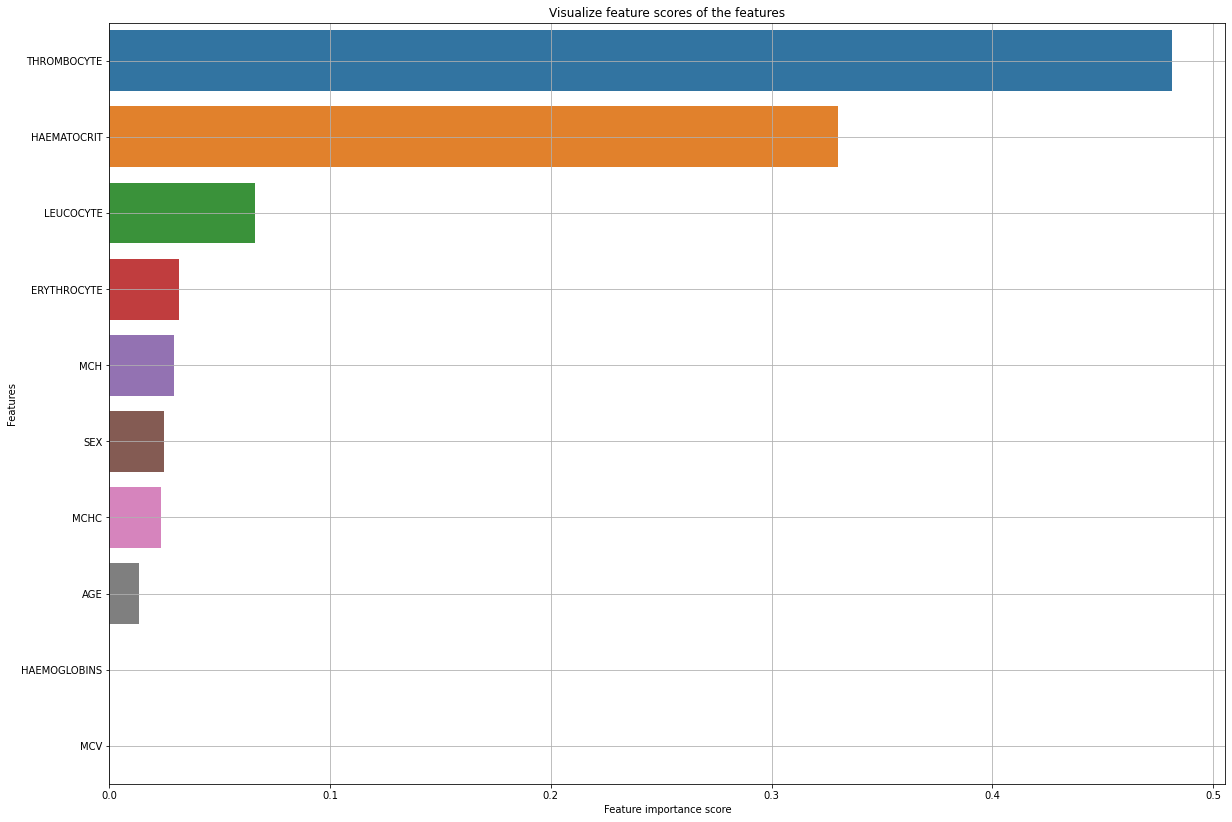

In [37]:
#Using the model that was used above to find the important features. 
find_feature_importance(tree)

From the above graph we can see that **Thrombocyte, Haematocrit and Leucocyte** are the main features that plays an important role in classifying Inpatient/Outpatient care.

Implementing the decision tree by using these three features, ccp_alpha value of 0.002 and tree depth of 3.

In [39]:
#Selecting only the important predictor variables and target variables for the algorithm, 
#with CCP_VALUE = 0.002 and MAX_DEPTH = 3 as obtained above
pred_var = patient_data[['THROMBOCYTE', 'HAEMATOCRIT', 'LEUCOCYTE']]
targ_var = patient_data['SOURCE']

# #Splitting the dataset into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25, random_state=7)

#We know the data for the predictor variables are not under the same ranges, thus scaling/normalization is required.
#Also, we saw that most of the fields has some outliers and are skewed. 
#Thus we will be using the Min Max Normalization process to normalize the data across all the fields.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Implementing the Decision Tree classifier using all of the available features from the dataset. 
#Using the entropy criterion to decide on the feature to be used for splitting. 
#The max_depth of the tree is not defined, thus allowing the tree to be expanded to all the leaf nodes.
tree = DecisionTreeClassifier(criterion="entropy", max_features="auto", ccp_alpha=0.002, max_depth=3, random_state=7)
tree.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(tree.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(tree.score(X_test, y_test)))

print("\nThe depth of the tree is {}".format(tree.get_depth()))

The accuracy of the training set is 0.7041515517936316
The accuracy of the testing set is 0.7137681159420289

The depth of the tree is 3


The accuracy obtained here with selected feature is slightly better than the previous implementation. Thus, we can see that by selecting only specific features does not impact much and looks like there is confounding variables that are affecting the accuracy. 

The accuracy of the training set is 1.0
The accuracy of the testing set is 0.7789855072463768


The feature importance scores obtained are: 
THROMBOCYTE     0.196677
LEUCOCYTE       0.123161
HAEMATOCRIT     0.111904
ERYTHROCYTE     0.103363
AGE             0.103014
MCV             0.092740
HAEMOGLOBINS    0.086244
MCHC            0.085623
MCH             0.080259
SEX             0.017014
dtype: float64



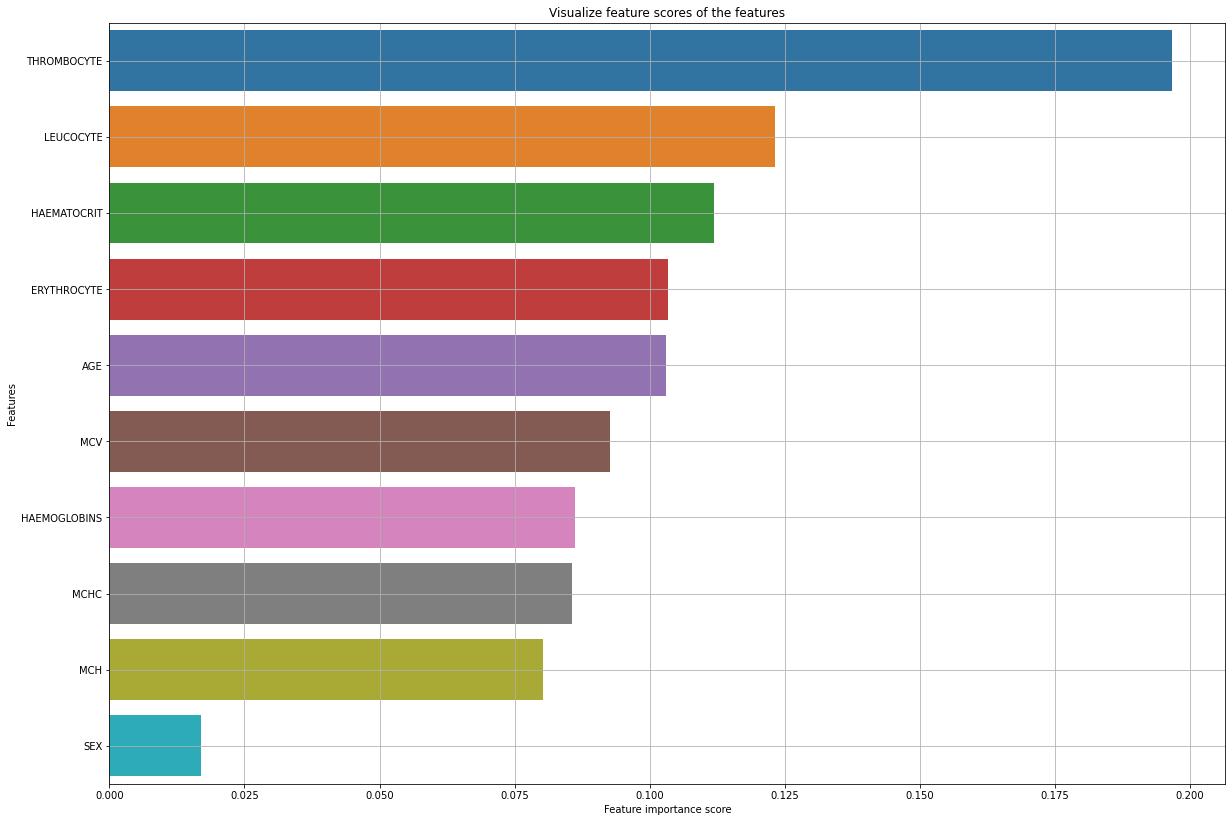

In [25]:
#Implementing Random Forest ensembles to test the accuracy

#Selecting the predictor variables and target variables for the algorithm. 
pred_var = patient_data.iloc[:, 0:10]
targ_var = patient_data['SOURCE']

# #Splitting the dataset into train and test set. 
X_train, X_test, y_train, y_test = train_test_split(pred_var, targ_var, test_size=0.25)

# #We know the data for the predictor variables are not under the same ranges, thus scaling/normalization is required.
# #Also, we saw that most of the fields has some outliers and are skewed. 
# #Thus we will be using the Min Max Normalization process to normalize the data across all the fields.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

rf_ensemble = RandomForestClassifier(n_estimators=150, criterion="entropy")
rf_ensemble.fit(X_train, y_train)

print("The accuracy of the training set is {}".format(rf_ensemble.score(X_train, y_train)))
print("The accuracy of the testing set is {}".format(rf_ensemble.score(X_test, y_test)))
print("\n")
find_feature_importance(rf_ensemble)

By using the Random Forest ensemble we can see that with providing 100 trees the accuracy of the training data is 100% and testing set is 78%. This is slightly better than the previous accuracy obtained. The random forest ensemble shows us that most of the features have high importance except one field for classification. 

Thus, the best test accuracy score we obtained using the Boosting ensemble is 77.17%  when learning_rate = 0.07


The feature importance scores obtained are: 
THROMBOCYTE     0.371966
HAEMATOCRIT     0.161806
LEUCOCYTE       0.144509
AGE             0.104262
ERYTHROCYTE     0.063587
HAEMOGLOBINS    0.040589
MCH             0.033844
MCV             0.033324
SEX             0.023682
MCHC            0.022432
dtype: float64



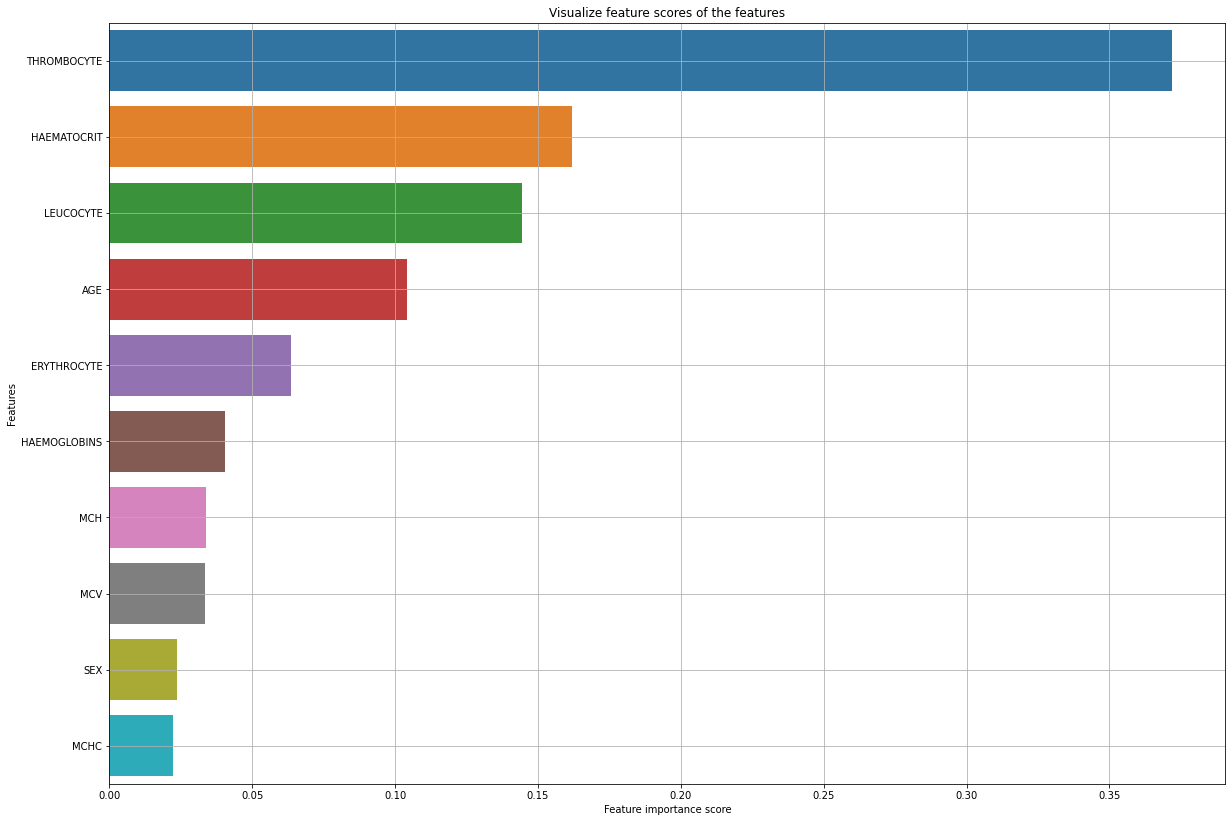

In [26]:
#Implementing the Boosting ensemble for multiple learning_rate to find the optimum learning rate value. 

arr = np.linspace(0.01, 0.1, 10)

test_scores = []
train_scores = []

for i in arr:
    boosting_ensemble = GradientBoostingClassifier(learning_rate=i)
    boosting_ensemble.fit(X_train, y_train)
    
    test_scores.append((boosting_ensemble.score(X_test, y_test), i))
    train_scores.append(boosting_ensemble.score(X_train, y_train))

test_scores.sort(reverse=True)

print("Thus, the best test accuracy score we obtained using the Boosting ensemble is {}% \
 when learning_rate = {}".format(round(test_scores[0][0]*100, 2), test_scores[0][1]))
print("\n")
      
boosting_ensemble = GradientBoostingClassifier(learning_rate=test_scores[0][1])
boosting_ensemble.fit(X_train, y_train)
      
find_feature_importance(boosting_ensemble)

By using the Boosting ensemble we can see that with learning rate of 0.07 provides the accuracy of testing set is 77%. This is similar to the previous accuracy obtained using Random Forest ensemble. The boosting ensemble uses only 3-5 feature as major important features. 

### Conclusion

Thus, from the above implementation of the decision tree we can conclude that high accuracy is not able to obtain. Prediction accuracy of about 75% in average is obtained with different hyperparameters and ensembles. This is mainly due to the dataset we have is not as well prepared as required and there are lot of noises present in the data. Also, the confounding variables might play a factor needs to be adjusted. With different implementation of the trees and ensembles we were getting different important features. 
In comparison with the K-NN algorithm, we were able to find the similar rate of accuracy. 